In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /homes/ld303/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/homes/ld303/dag/lib64/python3.4/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [2]:
!ls data

DJIA indices data.csv  Pickled_ten_year_filtered_data_(Articles_DJIA).pkl


In [3]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('./data/Pickled_ten_year_filtered_data_(Articles_DJIA).pkl')

In [4]:
df_stocks

close     adj close  \
2007-01-01  12469.971875  12469.971875   
2007-01-02  12472.245703  12472.245703   
2007-01-03  12474.519531  12474.519531   
2007-01-04  12480.690430  12480.690430   
2007-01-05  12398.009766  12398.009766   
2007-01-06  12406.503255  12406.503255   
2007-01-07  12414.996745  12414.996745   
2007-01-08  12423.490234  12423.490234   
2007-01-09  12416.599609  12416.599609   
2007-01-10  12442.160156  12442.160156   
2007-01-11  12514.980469  12514.980469   
2007-01-12  12556.080078  12556.080078   
2007-01-13  12562.707519  12562.707519   
2007-01-14  12569.334961  12569.334961   
2007-01-15  12575.962403  12575.962403   
2007-01-16  12582.589844  12582.589844   
2007-01-17  12577.150391  12577.150391   
2007-01-18  12567.929688  12567.929688   
2007-01-19  12565.530273  12565.530273   
2007-01-20  12536.073567  12536.073567   
2007-01-21  12506.616862  12506.616862   
2007-01-22  12477.160156  12477.160156   
2007-01-23  12533.799805  12533.799805   
2007-01-24  12621.769531  12621.769531   
2007-01-25  12502.559570  12502.559570   
2007-01-26  12487.019531  12487.019531   
2007-01-27  12488.273112  12488.273112   
2007-01-28  12489.526692  12489.526692   
2007-01-29  12490.780273  12490.780273   
2007-01-30  12523.309570  12523.309570   
...                  ...           ...   
2016-12-02  19170.419922  19170.419922   
2016-12-03  19185.693359  19185.693359   
2016-12-04  19200.966797  19200.966797   
2016-12-05  19216.240234  19216.240234   
2016-12-06  19251.779297  19251.779297   
2016-12-07  19549.619141  19549.619141   
2016-12-08  19614.810547  19614.810547   
2016-12-09  19756.849609  19756.849609   
2016-12-10  19770.042969  19770.042969   
2016-12-11  19783.236328  19783.236328   
2016-12-12  19796.429688  19796.429688   
2016-12-13  19911.210938  19911.210938   
2016-12-14  19792.529297  19792.529297   
2016-12-15  19852.240234  19852.240234   
2016-12-16  19843.410156  19843.410156   
2016-12-17  19856.626953  19856.626953   
2016-12-18  19869.843750  19869.843750   
2016-12-19  19883.060547  19883.060547   
2016-12-20  19974.619141  19974.619141   
2016-12-21  19941.960938  19941.960938   
2016-12-22  19918.880859  19918.880859   
2016-12-23  19933.810547  19933.810547   
2016-12-24  19936.617676  19936.617676   
2016-12-25  19939.424804  19939.424804   
2016-12-26  19942.231933  19942.231933   
2016-12-27  19945.039062  19945.039062   
2016-12-28  19833.679688  19833.679688   
2016-12-29  19819.779297  19819.779297   
2016-12-30  19762.599609  19762.599609   
2016-12-31  19762.599609  19762.599609   

                                                     articles  
2007-01-01  . What Sticks from '06. Somalia Orders Islamis...  
2007-01-02  . Heart Health: Vitamin Does Not Prevent Death...  
2007-01-03  . Google Answer to Filling Jobs Is an Algorith...  
2007-01-04  . Helping Make the Shift From Combat to Commer...  
2007-01-05  . Rise in Ethanol Raises Concerns About Corn a...  
2007-01-06  . A Status Quo Secretary General. Best Buy and...  
2007-01-07  . THE COMMON APPLICATION; Typo.com. Jumbo Bonu...  
2007-01-08  . VW Group’s Sales Rose Sharply in 2006. Conso...  
2007-01-09  . The Claim:  Hot Leftovers Should Cool at Roo...  
2007-01-10  . Love Among the Ruins. Dell Says Plant a Tree...  
2007-01-11  . The Computer With a TV, and a Family's Virtu...  
2007-01-12  . Make Them Fight All of Us. Hire by the Contr...  
2007-01-13  . Blair Urges Britain to Pursue an Aggressive ...  
2007-01-14  . Smoke Damage. Mr. Spitzer’s Task on Court Re...  
2007-01-15  . The Mentally Ill, Behind Bars. BP’s Chief to...  
2007-01-16  . King Day in Atlanta, ‘the One Without Mrs. K...  
2007-01-17  . Racial Hate Feeds a Gang War’s Senseless Kil...  
2007-01-18  . Taliban Detainee Says Rebel Chief Hides in P...  
2007-01-19  . Data Breach Could Affect Millions of TJX Sho...  
2007-01-20  . Archives of Spin. H.P. Chief Defends Timing ...  
2007-01-21  . Connecticut’s Diaspora. Son of Dogs Playing ...  
2007-0

In [5]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [6]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [7]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_stocks

prices                                           articles
2007-01-01   12469   What Sticks from '06. Somalia Orders Islamist...
2007-01-02   12472   Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03   12474   Google Answer to Filling Jobs Is an Algorithm...
2007-01-04   12480   Helping Make the Shift From Combat to Commerc...
2007-01-05   12398   Rise in Ethanol Raises Concerns About Corn as...
2007-01-06   12406   A Status Quo Secretary General. Best Buy and ...
2007-01-07   12414   THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08   12423   VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09   12416   The Claim:  Hot Leftovers Should Cool at Room...
2007-01-10   12442   Love Among the Ruins. Dell Says Plant a Tree,...
2007-01-11   12514   The Computer With a TV, and a Family's Virtua...
2007-01-12   12556   Make Them Fight All of Us. Hire by the Contra...
2007-01-13   12562   Blair Urges Britain to Pursue an Aggressive F...
2007-01-14   12569   Smoke Damage. Mr. Spitzer’s Task on Court Ref...
2007-01-15   12575   The Mentally Ill, Behind Bars. BP’s Chief to ...
2007-01-16   12582   King Day in Atlanta, ‘the One Without Mrs. Ki...
2007-01-17   12577   Racial Hate Feeds a Gang War’s Senseless Kill...
2007-01-18   12567   Taliban Detainee Says Rebel Chief Hides in Pa...
2007-01-19   12565   Data Breach Could Affect Millions of TJX Shop...
2007-01-20   12536   Archives of Spin. H.P. Chief Defends Timing o...
2007-01-21   12506   Connecticut’s Diaspora. Son of Dogs Playing P...
2007-01-22   12477   M dot Strange Finds a Way at Sundance. An Int...
2007-01-23   12533   2 Car Bombs Kill Scores at Packed Market in B...
2007-01-24   12621   Asian Rival Moves Past Las Vegas. Pennsylvani...
2007-01-25   12502   Quarterly Profit Surges at Cingular Wireless....
2007-01-26   12487   Renewal, in Real Estate and in Culture, for A...
2007-01-27   12488   Cracking the Books for Financial Aid to Colle...
2007-01-28   12489   First You Clear the Table. Delight in Science...
2007-01-29   12490   Courts Turn to Wikipedia, but Selectively. Te...
2007-01-30   12523   Can Humanity Survive? Want to Bet on It?. Awa...
...            ...                                                ...
2016-12-02   19170   Silicon Valley Chiefs Notably Absent From Tru...
2016-12-03   19185   Trump, Taiwan and China: The Controversy, Exp...
2016-12-04   19200   Hunting ‘Turr’ in Newfoundland’s Frigid Water...
2016-12-05   19216   Trump’s Meeting With Al Gore Gives Environmen...
2016-12-06   19251   Senate Republican Leaders Vow to Begin Repeal...
2016-12-07   19549   Can Congress Lift the Presidential Conflict o...
2016-12-08   19614   The Freaky Food Chain Behind Your Lobster Din...
2016-12-09   19756   Trump Spent Far Less Than Clinton, but Paid H...
2016-12-10   19770   As Turkey Cracks Down, Kurdish Mayors Pack Ba...
2016-12-11   19783   I.M.F. Chief Heads to Trial; Fed Is Expected ...
2016-12-12   19796   Pennsylvania and Wisconsin End Election Recou...
2016-12-13   19911   The Most Talked-About Debates of 2016. Wells ...
2016-12-14   19792   Can Trump Get Tough With China?. The Oakland ...
2016-12-15   19852   Hispanic Surnames on the Rise in U.S. as Immi...
2016-12-16   19843   Vine, the Six-Second Video App, Is Not Quite ...
2016-12-17   19856   Trump’s Win Helps Carve a Path to Washington ...
2016-12-18   19869   With Comic Book, Celebrities Pay Tribute to O...
2016-12-19   19883   Donald Trump and the C.I.A.. Vincent Viola, B...
2016-12-20   19974   Can Trump's Infrastructure Plan Work?. Volksw...
2016-12-21   19941   Совершенное орудие: как российская кибермощь ...
2016-12-22   19918   New Ebola Vaccine Gives 100 Percent Protectio...
2016-12-23   19933   Flurry of Settlements Over Toxic Mortgages Ma...
2016-12-24   19936   Jason Miller Backs Out of White House Communi...
2016-12-25   19939   Wielding Claims of ‘Fake News,’ Conservatives...
2016-12-26   19942   When One Party Has the Governor’s Mansion and...
2016-12-27   19945   S

In [9]:
df = df_stocks[['prices']].copy()
df

prices
2007-01-01   12469
2007-01-02   12472
2007-01-03   12474
2007-01-04   12480
2007-01-05   12398
2007-01-06   12406
2007-01-07   12414
2007-01-08   12423
2007-01-09   12416
2007-01-10   12442
2007-01-11   12514
2007-01-12   12556
2007-01-13   12562
2007-01-14   12569
2007-01-15   12575
2007-01-16   12582
2007-01-17   12577
2007-01-18   12567
2007-01-19   12565
2007-01-20   12536
2007-01-21   12506
2007-01-22   12477
2007-01-23   12533
2007-01-24   12621
2007-01-25   12502
2007-01-26   12487
2007-01-27   12488
2007-01-28   12489
2007-01-29   12490
2007-01-30   12523
...            ...
2016-12-02   19170
2016-12-03   19185
2016-12-04   19200
2016-12-05   19216
2016-12-06   19251
2016-12-07   19549
2016-12-08   19614
2016-12-09   19756
2016-12-10   19770
2016-12-11   19783
2016-12-12   19796
2016-12-13   19911
2016-12-14   19792
2016-12-15   19852
2016-12-16   19843
2016-12-17   19856
2016-12-18   19869
2016-12-19   19883
2016-12-20   19974
2016-12-21   19941
2016-12-22   19918
2016-12-23   19933
2016-12-24   19936
2016-12-25   19939
2016-12-26   19942
2016-12-27   19945
2016-12-28   19833
2016-12-29   19819
2016-12-30   19762
2016-12-31   19762

[3653 rows x 1 columns]

In [10]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [11]:
df

prices compound neg neu pos
2007-01-01   12469                     
2007-01-02   12472                     
2007-01-03   12474                     
2007-01-04   12480                     
2007-01-05   12398                     
2007-01-06   12406                     
2007-01-07   12414                     
2007-01-08   12423                     
2007-01-09   12416                     
2007-01-10   12442                     
2007-01-11   12514                     
2007-01-12   12556                     
2007-01-13   12562                     
2007-01-14   12569                     
2007-01-15   12575                     
2007-01-16   12582                     
2007-01-17   12577                     
2007-01-18   12567                     
2007-01-19   12565                     
2007-01-20   12536                     
2007-01-21   12506                     
2007-01-22   12477                     
2007-01-23   12533                     
2007-01-24   12621                     
2007-01-25   12502                     
2007-01-26   12487                     
2007-01-27   12488                     
2007-01-28   12489                     
2007-01-29   12490                     
2007-01-30   12523                     
...            ...      ...  ..  ..  ..
2016-12-02   19170                     
2016-12-03   19185                     
2016-12-04   19200                     
2016-12-05   19216                     
2016-12-06   19251                     
2016-12-07   19549                     
2016-12-08   19614                     
2016-12-09   19756                     
2016-12-10   19770                     
2016-12-11   19783                     
2016-12-12   19796                     
2016-12-13   19911                     
2016-12-14   19792                     
2016-12-15   19852                     
2016-12-16   19843                     
2016-12-17   19856                     
2016-12-18   19869                     
2016-12-19   19883                     
2016-12-20   19974                     
2016-12-21   19941                     
2016-12-22   19918                     
2016-12-23   19933                     
2016-12-24   19936                     
2016-12-25   19939                     
2016-12-26   19942                     
2016-12-27   19945                     
2016-12-28   19833                     
2016-12-29   19819                     
2016-12-30   19762                     
2016-12-31   19762                     

[3653 rows x 5 columns]

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
#         sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii','ignore')
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(df_stocks.loc[date, 'articles'])
        print(date)

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [13]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
# ss = sid.polarity_scores(sentence)
# ss

In [14]:
# Checking date for empty strings
# for date, row in df_stocks.T.iteritems():
#     if type(df_stocks.loc[date, 'articles']).__name__ == 'str':
#         print date

In [15]:
df

prices compound    neg    neu    pos
2007-01-01   12469  -0.9814  0.159  0.749  0.093
2007-01-02   12472  -0.8179  0.114  0.787  0.099
2007-01-03   12474  -0.9993  0.198  0.737  0.065
2007-01-04   12480  -0.9982  0.131  0.806  0.062
2007-01-05   12398  -0.9901  0.124  0.794  0.082
2007-01-06   12406   -0.965  0.134  0.771  0.094
2007-01-07   12414  -0.9975  0.193  0.739  0.069
2007-01-08   12423  -0.9601   0.11  0.793  0.097
2007-01-09   12416  -0.9953  0.103  0.848  0.049
2007-01-10   12442  -0.9534  0.134  0.743  0.123
2007-01-11   12514   -0.998  0.128  0.814  0.057
2007-01-12   12556  -0.9986  0.158  0.784  0.059
2007-01-13   12562  -0.9893  0.146  0.794  0.059
2007-01-14   12569    -0.99  0.178  0.711  0.111
2007-01-15   12575  -0.2636  0.088   0.83  0.082
2007-01-16   12582  -0.9798   0.11  0.804  0.086
2007-01-17   12577  -0.9986  0.176  0.743  0.081
2007-01-18   12567  -0.9994  0.213    0.7  0.086
2007-01-19   12565  -0.9959  0.116  0.822  0.062
2007-01-20   12536  -0.9841  0.132  0.786  0.081
2007-01-21   12506  -0.9851   0.14  0.775  0.084
2007-01-22   12477  -0.5638  0.099  0.804  0.097
2007-01-23   12533  -0.9989  0.153  0.781  0.066
2007-01-24   12621  -0.9921  0.138  0.757  0.105
2007-01-25   12502  -0.9965  0.153  0.744  0.103
2007-01-26   12487   -0.997  0.143   0.78  0.077
2007-01-27   12488  -0.9786  0.128  0.802   0.07
2007-01-28   12489  -0.9865  0.157  0.753   0.09
2007-01-29   12490  -0.9359  0.135  0.739  0.126
2007-01-30   12523  -0.9992  0.183  0.727   0.09
...            ...      ...    ...    ...    ...
2016-12-02   19170  -0.9962  0.155  0.768  0.077
2016-12-03   19185  -0.9827   0.16  0.737  0.103
2016-12-04   19200  -0.9719  0.165  0.772  0.063
2016-12-05   19216  -0.9636  0.165  0.691  0.144
2016-12-06   19251  -0.9967  0.172  0.726  0.103
2016-12-07   19549  -0.9735  0.118  0.794  0.087
2016-12-08   19614  -0.9944  0.145  0.785   0.07
2016-12-09   19756  -0.9968  0.173  0.726  0.101
2016-12-10   19770  -0.9952  0.171  0.747  0.082
2016-12-11   19783  -0.0772  0.099  0.808  0.093
2016-12-12   19796  -0.9697  0.126  0.775    0.1
2016-12-13   19911  -0.9986  0.173   0.76  0.067
2016-12-14   19792  -0.9674  0.121    0.8   0.08
2016-12-15   19852  -0.9912  0.118  0.834  0.049
2016-12-16   19843  -0.9896  0.141  0.776  0.083
2016-12-17   19856  -0.9859  0.133  0.795  0.072
2016-12-18   19869  -0.9884  0.206   0.73  0.064
2016-12-19   19883  -0.9942  0.148   0.77  0.082
2016-12-20   19974  -0.9641  0.113  0.816  0.071
2016-12-21   19941  -0.9955  0.153  0.776  0.071
2016-12-22   19918  -0.9983  0.199  0.724  0.077
2016-12-23   19933  -0.9864  0.154  0.737   0.11
2016-12-24   19936  -0.9234  0.152  0.748    0.1
2016-12-25   19939  -0.9851  0.164  0.777  0.059
2016-12-26   19942  -0.9704  0.154  0.746    0.1
2016-12-27   19945  -0.9898  0.178  0.719  0.103
2016-12-28   19833   0.2869  0.128  0.763  0.108
2016-12-29   19819  -0.9789  0.138  0.764  0.097
2016-12-30   19762   -0.995  0.168  0.734  0.098
2016-12-31   19762  -0.2869  0.173  0.665  0.161

[3653 rows x 5 columns]

In [16]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [17]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [18]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [19]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [20]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
print(rf.feature_importances_)

[0.52369028 0.47630972]


In [22]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [23]:
prediction

array([12906.7       , 12352.05      , 12359.16666667, 13206.        ,
       13783.7       , 15320.6       , 12047.9       , 14188.5       ,
       16308.06      , 11329.4       , 13689.76666667, 10132.6       ,
       12331.2       , 12047.18333333, 13002.05      , 13179.2       ,
       14460.        , 12571.2       , 12759.4       , 12801.3       ,
       11213.65      , 12113.6       ,  9810.4       , 11126.9       ,
       13259.36666667, 11993.6       , 10972.98571429, 13332.43333333,
       11265.9       , 14179.1       , 14665.86      , 12265.2       ,
       13277.4       , 13599.51428571, 11593.16666667, 14130.6       ,
       13942.45119048, 11553.3       , 12678.3       , 11330.1       ,
       10540.        , 11685.525     , 12031.6       , 11806.3       ,
       12854.7       , 12861.56666667, 10626.7       , 15860.9       ,
       16577.4       , 14029.54666667, 16065.95      , 12161.1       ,
       11642.2       , 12123.1       , 13122.84166667, 10337.4       ,
      

In [24]:
contributions

array([[  671.36442208,  -359.10347068],
       [ -326.08357634,    83.69452774],
       [  -80.97217017,  -154.30021176],
       ...,
       [ -361.59807365,   424.60569172],
       [ 1490.72550104,  -767.38954964],
       [-1585.52710091,  -935.71194769]])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [27]:
predictions_df

prices
2015-01-01  12906.700000
2015-01-02  12352.050000
2015-01-03  12359.166667
2015-01-04  13206.000000
2015-01-05  13783.700000
2015-01-06  15320.600000
2015-01-07  12047.900000
2015-01-08  14188.500000
2015-01-09  16308.060000
2015-01-10  11329.400000
2015-01-11  13689.766667
2015-01-12  10132.600000
2015-01-13  12331.200000
2015-01-14  12047.183333
2015-01-15  13002.050000
2015-01-16  13179.200000
2015-01-17  14460.000000
2015-01-18  12571.200000
2015-01-19  12759.400000
2015-01-20  12801.300000
2015-01-21  11213.650000
2015-01-22  12113.600000
2015-01-23   9810.400000
2015-01-24  11126.900000
2015-01-25  13259.366667
2015-01-26  11993.600000
2015-01-27  10972.985714
2015-01-28  13332.433333
2015-01-29  11265.900000
2015-01-30  14179.100000
...                  ...
2016-12-02  12787.266667
2016-12-03  12417.600000
2016-12-04  13592.900000
2016-12-05  13011.200000
2016-12-06  13248.600000
2016-12-07  13333.931667
2016-12-08  14766.300000
2016-12-09  12013.475000
2016-12-10  13949.300000
2016-12-11  13629.200000
2016-12-12  13904.033333
2016-12-13  15210.800000
2016-12-14  12600.200000
2016-12-15  13566.900000
2016-12-16  12464.550000
2016-12-17  10663.100000
2016-12-18  13649.700000
2016-12-19  11434.250000
2016-12-20  13934.200000
2016-12-21  12696.600000
2016-12-22  13193.600000
2016-12-23  12894.300000
2016-12-24  14114.258333
2016-12-25  14419.700000
2016-12-26  14067.750000
2016-12-27  11821.700000
2016-12-28  13738.133333
2016-12-29  12657.446667
2016-12-30  13317.775000
2016-12-31  10073.200000

[731 rows x 1 columns]

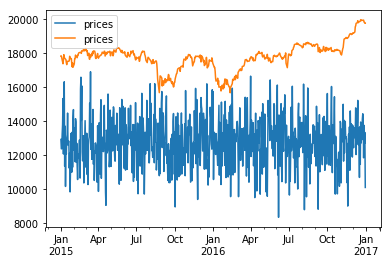

In [28]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
# fig.savefig("graphs/random_forest_without_smoothing.png")

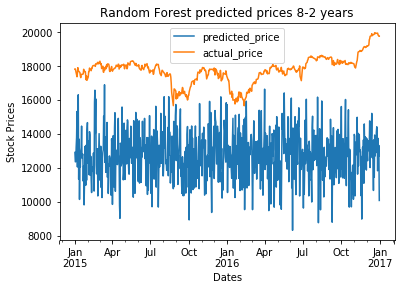

In [29]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

In [30]:
test

prices compound    neg    neu    pos
2015-01-01   17828  -0.9299  0.138   0.74  0.122
2015-01-02   17832  -0.9775  0.149  0.759  0.093
2015-01-03   17722  -0.9737  0.131  0.787  0.083
2015-01-04   17612  -0.9971   0.22  0.716  0.064
2015-01-05   17501  -0.9905  0.156  0.767  0.077
2015-01-06   17371  -0.9985  0.171  0.752  0.077
2015-01-07   17584  -0.9965  0.148  0.788  0.064
2015-01-08   17907  -0.9992  0.185  0.734   0.08
2015-01-09   17737  -0.9977  0.172  0.741  0.087
2015-01-10   17705  -0.9979  0.198  0.751  0.051
2015-01-11   17673  -0.9947  0.159  0.775  0.066
2015-01-12   17640  -0.9813  0.127  0.786  0.088
2015-01-13   17613  -0.9982  0.167  0.746  0.088
2015-01-14   17427  -0.9937  0.137   0.77  0.093
2015-01-15   17320  -0.9959  0.141  0.771  0.089
2015-01-16   17511   -0.998  0.187  0.705  0.108
2015-01-17   17512  -0.9951  0.164  0.779  0.057
2015-01-18   17513  -0.9907  0.169  0.734  0.096
2015-01-19   17514   -0.982  0.167  0.703   0.13
2015-01-20   17515  -0.5172  0.103  0.808  0.089
2015-01-21   17554  -0.9947  0.135  0.772  0.092
2015-01-22   17813   -0.994  0.114  0.821  0.065
2015-01-23   17672  -0.3318  0.126  0.754  0.119
2015-01-24   17674  -0.9883  0.187   0.67  0.143
2015-01-25   17676  -0.9806  0.169  0.715  0.116
2015-01-26   17678  -0.6183  0.075  0.844   0.08
2015-01-27   17387  -0.9886  0.108  0.825  0.067
2015-01-28   17191  -0.9985  0.183  0.726  0.091
2015-01-29   17416  -0.9961  0.153   0.75  0.096
2015-01-30   17164  -0.9927  0.147  0.747  0.105
...            ...      ...    ...    ...    ...
2016-12-02   19170  -0.9962  0.155  0.768  0.077
2016-12-03   19185  -0.9827   0.16  0.737  0.103
2016-12-04   19200  -0.9719  0.165  0.772  0.063
2016-12-05   19216  -0.9636  0.165  0.691  0.144
2016-12-06   19251  -0.9967  0.172  0.726  0.103
2016-12-07   19549  -0.9735  0.118  0.794  0.087
2016-12-08   19614  -0.9944  0.145  0.785   0.07
2016-12-09   19756  -0.9968  0.173  0.726  0.101
2016-12-10   19770  -0.9952  0.171  0.747  0.082
2016-12-11   19783  -0.0772  0.099  0.808  0.093
2016-12-12   19796  -0.9697  0.126  0.775    0.1
2016-12-13   19911  -0.9986  0.173   0.76  0.067
2016-12-14   19792  -0.9674  0.121    0.8   0.08
2016-12-15   19852  -0.9912  0.118  0.834  0.049
2016-12-16   19843  -0.9896  0.141  0.776  0.083
2016-12-17   19856  -0.9859  0.133  0.795  0.072
2016-12-18   19869  -0.9884  0.206   0.73  0.064
2016-12-19   19883  -0.9942  0.148   0.77  0.082
2016-12-20   19974  -0.9641  0.113  0.816  0.071
2016-12-21   19941  -0.9955  0.153  0.776  0.071
2016-12-22   19918  -0.9983  0.199  0.724  0.077
2016-12-23   19933  -0.9864  0.154  0.737   0.11
2016-12-24   19936  -0.9234  0.152  0.748    0.1
2016-12-25   19939  -0.9851  0.164  0.777  0.059
2016-12-26   19942  -0.9704  0.154  0.746    0.1
2016-12-27   19945  -0.9898  0.178  0.719  0.103
2016-12-28   19833   0.2869  0.128  0.763  0.108
2016-12-29   19819  -0.9789  0.138  0.764  0.097
2016-12-30   19762   -0.995  0.168  0.734  0.098
2016-12-31   19762  -0.2869  0.173  0.665  0.161

[731 rows x 5 columns]

# Increasing the prices by a constant value so that it represents closing price during the testing

In [31]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print(average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print(temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print(average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print(difference_test_predicted_prices)

17679.9
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
13380.207666666665
4299.692333333336


In [32]:
predictions_df

prices
2015-01-01  12906.700000
2015-01-02  12352.050000
2015-01-03  12359.166667
2015-01-04  13206.000000
2015-01-05  13783.700000
2015-01-06  15320.600000
2015-01-07  12047.900000
2015-01-08  14188.500000
2015-01-09  16308.060000
2015-01-10  11329.400000
2015-01-11  13689.766667
2015-01-12  10132.600000
2015-01-13  12331.200000
2015-01-14  12047.183333
2015-01-15  13002.050000
2015-01-16  13179.200000
2015-01-17  14460.000000
2015-01-18  12571.200000
2015-01-19  12759.400000
2015-01-20  12801.300000
2015-01-21  11213.650000
2015-01-22  12113.600000
2015-01-23   9810.400000
2015-01-24  11126.900000
2015-01-25  13259.366667
2015-01-26  11993.600000
2015-01-27  10972.985714
2015-01-28  13332.433333
2015-01-29  11265.900000
2015-01-30  14179.100000
...                  ...
2016-12-02  12787.266667
2016-12-03  12417.600000
2016-12-04  13592.900000
2016-12-05  13011.200000
2016-12-06  13248.600000
2016-12-07  13333.931667
2016-12-08  14766.300000
2016-12-09  12013.475000
2016-12-10  13949.300000
2016-12-11  13629.200000
2016-12-12  13904.033333
2016-12-13  15210.800000
2016-12-14  12600.200000
2016-12-15  13566.900000
2016-12-16  12464.550000
2016-12-17  10663.100000
2016-12-18  13649.700000
2016-12-19  11434.250000
2016-12-20  13934.200000
2016-12-21  12696.600000
2016-12-22  13193.600000
2016-12-23  12894.300000
2016-12-24  14114.258333
2016-12-25  14419.700000
2016-12-26  14067.750000
2016-12-27  11821.700000
2016-12-28  13738.133333
2016-12-29  12657.446667
2016-12-30  13317.775000
2016-12-31  10073.200000

[731 rows x 1 columns]

In [33]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

prices
2015-01-01  17206.392333
2015-01-02  16651.742333
2015-01-03  16658.859000
2015-01-04  17505.692333
2015-01-05  18083.392333
2015-01-06  19620.292333
2015-01-07  16347.592333
2015-01-08  18488.192333
2015-01-09  20607.752333
2015-01-10  15629.092333
2015-01-11  17989.459000
2015-01-12  14432.292333
2015-01-13  16630.892333
2015-01-14  16346.875667
2015-01-15  17301.742333
2015-01-16  17478.892333
2015-01-17  18759.692333
2015-01-18  16870.892333
2015-01-19  17059.092333
2015-01-20  17100.992333
2015-01-21  15513.342333
2015-01-22  16413.292333
2015-01-23  14110.092333
2015-01-24  15426.592333
2015-01-25  17559.059000
2015-01-26  16293.292333
2015-01-27  15272.678048
2015-01-28  17632.125667
2015-01-29  15565.592333
2015-01-30  18478.792333
...                  ...
2016-12-02  17086.959000
2016-12-03  16717.292333
2016-12-04  17892.592333
2016-12-05  17310.892333
2016-12-06  17548.292333
2016-12-07  17633.624000
2016-12-08  19065.992333
2016-12-09  16313.167333
2016-12-10  18248.992333
2016-12-11  17928.892333
2016-12-12  18203.725667
2016-12-13  19510.492333
2016-12-14  16899.892333
2016-12-15  17866.592333
2016-12-16  16764.242333
2016-12-17  14962.792333
2016-12-18  17949.392333
2016-12-19  15733.942333
2016-12-20  18233.892333
2016-12-21  16996.292333
2016-12-22  17493.292333
2016-12-23  17193.992333
2016-12-24  18413.950667
2016-12-25  18719.392333
2016-12-26  18367.442333
2016-12-27  16121.392333
2016-12-28  18037.825667
2016-12-29  16957.139000
2016-12-30  17617.467333
2016-12-31  14372.892333

[731 rows x 1 columns]

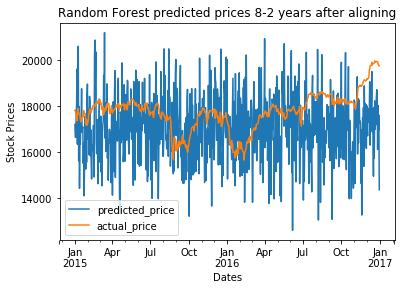

In [34]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest with aligning.png")



# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [35]:
predictions_df

prices
2015-01-01  17206.392333
2015-01-02  16651.742333
2015-01-03  16658.859000
2015-01-04  17505.692333
2015-01-05  18083.392333
2015-01-06  19620.292333
2015-01-07  16347.592333
2015-01-08  18488.192333
2015-01-09  20607.752333
2015-01-10  15629.092333
2015-01-11  17989.459000
2015-01-12  14432.292333
2015-01-13  16630.892333
2015-01-14  16346.875667
2015-01-15  17301.742333
2015-01-16  17478.892333
2015-01-17  18759.692333
2015-01-18  16870.892333
2015-01-19  17059.092333
2015-01-20  17100.992333
2015-01-21  15513.342333
2015-01-22  16413.292333
2015-01-23  14110.092333
2015-01-24  15426.592333
2015-01-25  17559.059000
2015-01-26  16293.292333
2015-01-27  15272.678048
2015-01-28  17632.125667
2015-01-29  15565.592333
2015-01-30  18478.792333
...                  ...
2016-12-02  17086.959000
2016-12-03  16717.292333
2016-12-04  17892.592333
2016-12-05  17310.892333
2016-12-06  17548.292333
2016-12-07  17633.624000
2016-12-08  19065.992333
2016-12-09  16313.167333
2016-12-10  18248.992333
2016-12-11  17928.892333
2016-12-12  18203.725667
2016-12-13  19510.492333
2016-12-14  16899.892333
2016-12-15  17866.592333
2016-12-16  16764.242333
2016-12-17  14962.792333
2016-12-18  17949.392333
2016-12-19  15733.942333
2016-12-20  18233.892333
2016-12-21  16996.292333
2016-12-22  17493.292333
2016-12-23  17193.992333
2016-12-24  18413.950667
2016-12-25  18719.392333
2016-12-26  18367.442333
2016-12-27  16121.392333
2016-12-28  18037.825667
2016-12-29  16957.139000
2016-12-30  17617.467333
2016-12-31  14372.892333

[731 rows x 1 columns]

In [36]:
predictions_df['ewma'] = pd.ewma(predictions_df["prices"], span=60, freq="D")

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=60,ignore_na=False,adjust=True,min_periods=0).mean()
  """Entry point for launching an IPython kernel.


In [37]:
predictions_df

prices          ewma
2015-01-01  17206.392333  17206.392333
2015-01-02  16651.742333  16924.445250
2015-01-03  16658.859000  16832.949422
2015-01-04  17505.692333  17009.636290
2015-01-05  18083.392333  17238.938764
2015-01-06  19620.292333  17669.627569
2015-01-07  16347.592333  17461.363845
2015-01-08  18488.192333  17605.182141
2015-01-09  20607.752333  17984.981631
2015-01-10  15629.092333  17712.513283
2015-01-11  17989.459000  17742.092087
2015-01-12  14432.292333  17412.955144
2015-01-13  16630.892333  17340.044312
2015-01-14  16346.875667  17252.729785
2015-01-15  17301.742333  17256.813595
2015-01-16  17478.892333  17274.427465
2015-01-17  18759.692333  17386.991949
2015-01-18  16870.892333  17349.490638
2015-01-19  17059.092333  17329.198611
2015-01-20  17100.992333  17313.822637
2015-01-21  15513.342333  17196.566691
2015-01-22  16413.292333  17147.153998
2015-01-23  14110.092333  16961.195764
2015-01-24  15426.592333  16869.831189
2015-01-25  17559.059000  16909.796207
2015-01-26  16293.292333  16874.926753
2015-01-27  15272.678048  16786.407947
2015-01-28  17632.125667  16832.104647
2015-01-29  15565.592333  16765.094837
2015-01-30  18478.792333  16853.976261
...                  ...           ...
2016-12-02  17086.959000  16919.409445
2016-12-03  16717.292333  16912.782654
2016-12-04  17892.592333  16944.907562
2016-12-05  17310.892333  16956.907062
2016-12-06  17548.292333  16976.296743
2016-12-07  17633.624000  16997.848457
2016-12-08  19065.992333  17065.656453
2016-12-09  16313.167333  17040.984678
2016-12-10  18248.992333  17080.591487
2016-12-11  17928.892333  17108.404629
2016-12-12  18203.725667  17144.316794
2016-12-13  19510.492333  17221.896320
2016-12-14  16899.892333  17211.338812
2016-12-15  17866.592333  17232.822534
2016-12-16  16764.242333  17217.459249
2016-12-17  14962.792333  17143.535744
2016-12-18  17949.392333  17169.957271
2016-12-19  15733.942333  17122.874814
2016-12-20  18233.892333  17159.301618
2016-12-21  16996.292333  17153.957051
2016-12-22  17493.292333  17165.082798
2016-12-23  17193.992333  17166.030652
2016-12-24  18413.950667  17206.946062
2016-12-25  18719.392333  17256.534465
2016-12-26  18367.442333  17292.957673
2016-12-27  16121.392333  17254.545695
2016-12-28  18037.825667  17280.227006
2016-12-29  16957.139000  17269.633956
2016-12-30  17617.467333  17281.038329
2016-12-31  14372.892333  17185.689280

[731 rows x 2 columns]

In [38]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D")

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=60,ignore_na=False,adjust=True,min_periods=0).mean()
  


In [39]:
predictions_df

prices          ewma  actual_value  actual_value_ewma
2015-01-01  17206.392333  17206.392333         17828       17828.000000
2015-01-02  16651.742333  16924.445250         17832       17830.033333
2015-01-03  16658.859000  16832.949422         17722       17792.815295
2015-01-04  17505.692333  17009.636290         17612       17745.326592
2015-01-05  18083.392333  17238.938764         17501       17693.150223
2015-01-06  19620.292333  17669.627569         17371       17634.886512
2015-01-07  16347.592333  17461.363845         17584       17626.870225
2015-01-08  18488.192333  17605.182141         17907       17666.105392
2015-01-09  20607.752333  17984.981631         17737       17675.072954
2015-01-10  15629.092333  17712.513283         17705       17678.534141
2015-01-11  17989.459000  17742.092087         17673       17677.943075
2015-01-12  14432.292333  17412.955144         17640       17674.169895
2015-01-13  16630.892333  17340.044312         17613       17668.467095
2015-01-14  16346.875667  17252.729785         17427       17647.238490
2015-01-15  17301.742333  17256.813595         17320       17619.972414
2015-01-16  17478.892333  17274.427465         17511       17611.329416
2015-01-17  18759.692333  17386.991949         17512       17603.801490
2015-01-18  16870.892333  17349.490638         17513       17597.203587
2015-01-19  17059.092333  17329.198611         17514       17591.389609
2015-01-20  17100.992333  17313.822637         17515       17586.242667
2015-01-21  15513.342333  17196.566691         17554       17584.142869
2015-01-22  16413.292333  17147.153998         17813       17598.580271
2015-01-23  14110.092333  16961.195764         17672       17603.075736
2015-01-24  15426.592333  16869.831189         17674       17607.298303
2015-01-25  17559.059000  16909.796207         17676       17611.281985
2015-01-26  16293.292333  16874.926753         17678       17615.055555
2015-01-27  15272.678048  16786.407947         17387       17602.456259
2015-01-28  17632.125667  16832.104647         17191       17580.224027
2015-01-29  15565.592333  16765.094837         17416       17571.535109
2015-01-30  18478.792333  16853.976261         17164       17550.398181
...                  ...           ...           ...                ...
2016-12-02  17086.959000  16919.409445         19170       18640.525611
2016-12-03  16717.292333  16912.782654         19185       18658.377230
2016-12-04  17892.592333  16944.907562         19200       18676.135354
2016-12-05  17310.892333  16956.907062         19216       18693.835834
2016-12-06  17548.292333  16976.296743         19251       18712.103512
2016-12-07  17633.624000  16997.848457         19549       18739.542741
2016-12-08  19065.992333  17065.656453         19614       18768.213471
2016-12-09  16313.167333  17040.984678         19756       18800.599914
2016-12-10  18248.992333  17080.591487         19770       18832.383524
2016-12-11  17928.892333  17108.404629         19783       18863.551277
2016-12-12  18203.725667  17144.316794         19796       18894.123366
2016-12-13  19510.492333  17221.896320         19911       18927.463584
2016-12-14  16899.892333  17211.338812         19792       18955.809040
2016-12-15  17866.592333  17232.822534         19852       18985.192350
2016-12-16  16764.242333  17217.459249         19843       19013.317191
2016-12-17  14962.792333  17143.535744         19856       19040.946136
2016-12-18  17949.392333  17169.957271         19869       19068.095443
2016-12-19  15733.942333  17122.874814         19883       19094.813625
2016-12-20  18233.892333  17159.301618         19974       19123.639408
2016-12-21  16996.292333  17153.957051         19941       19150.438116
2016-12-22  17493.292333  17165.082798         19918       19175.604079
2016-12-23  17193.992333  17166.030652         19933       19200.436732
2016-12-24  18413.950667  17206.946062         19936       19224.553561
2016-12-25  18719.392333  17256.534465         19939      

In [40]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

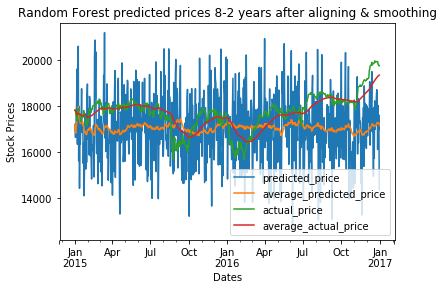

In [41]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing.png")


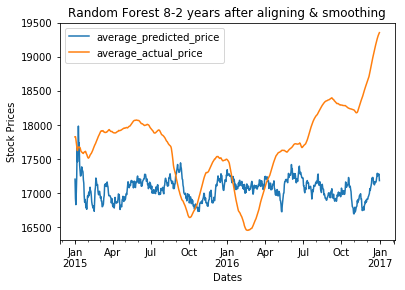

In [42]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing 2.png")

# Increasing the prices by a constant value so that it represents closing price during the testing

In [43]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

# LogisticRegression

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=10,ignore_na=False,adjust=True,min_periods=0).mean()
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=10,ignore_na=False,adjust=True,min_periods=0).mean()


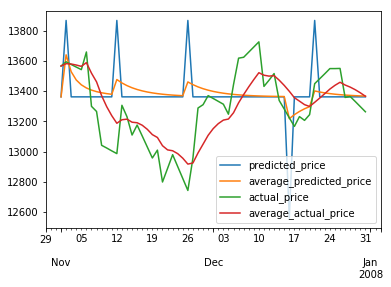

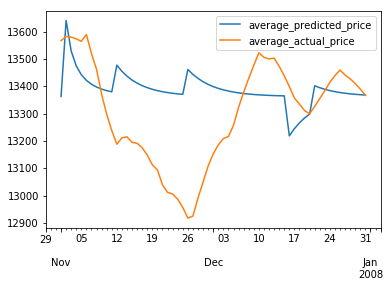

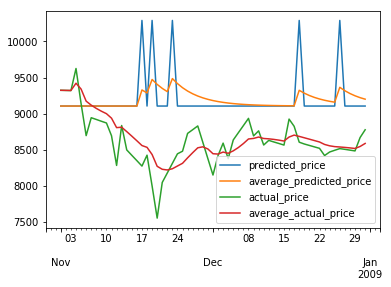

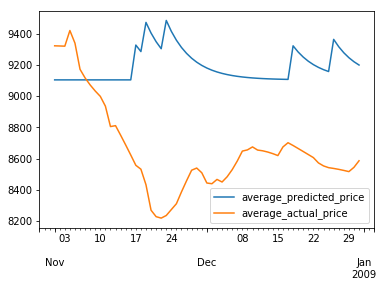

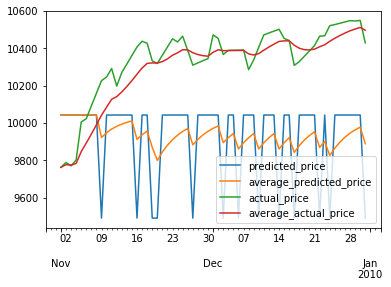

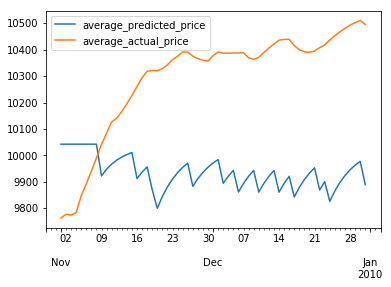

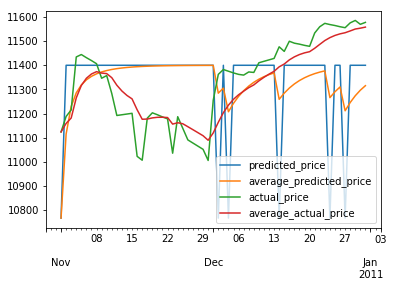

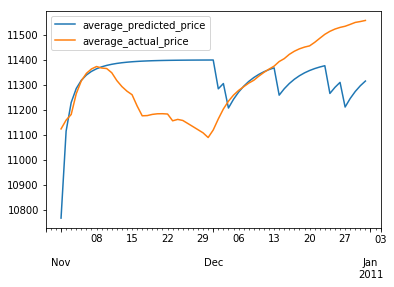

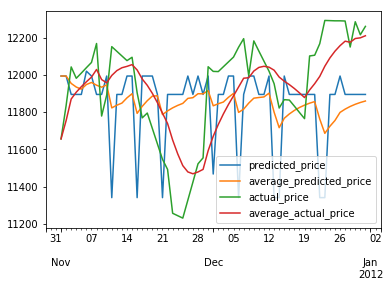

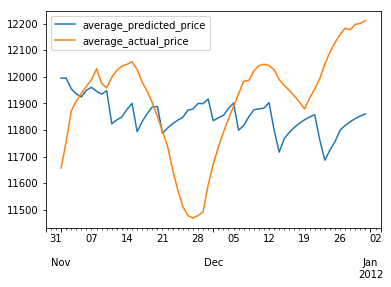

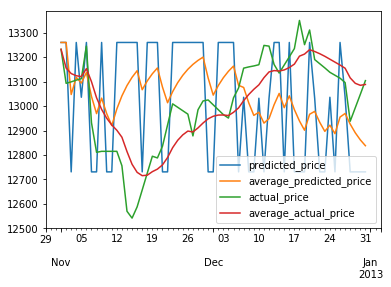

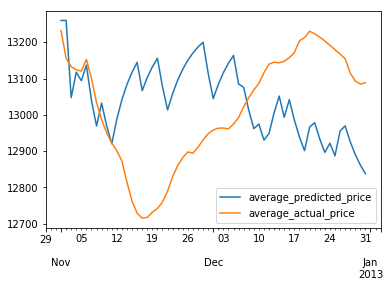

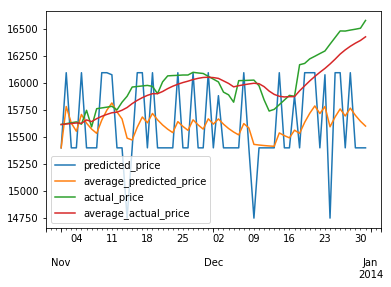

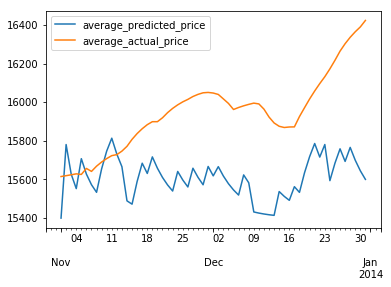

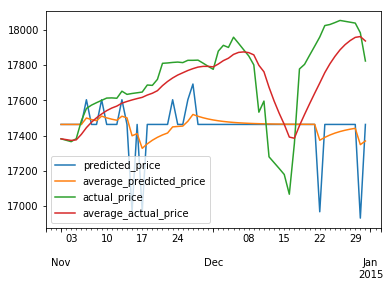

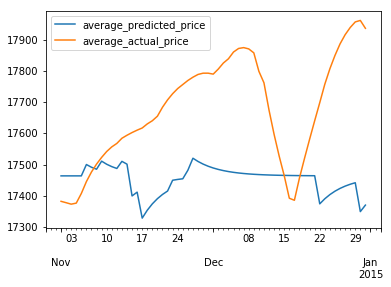

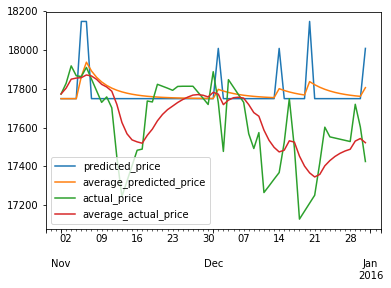

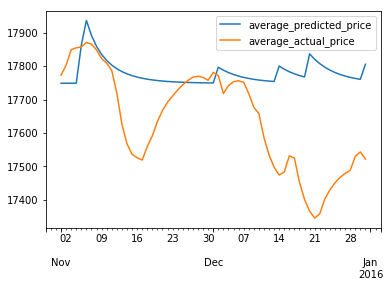

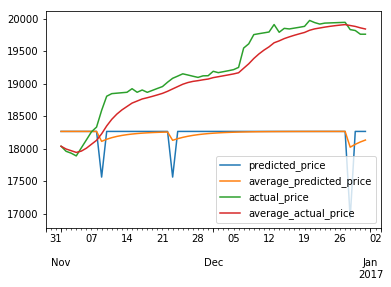

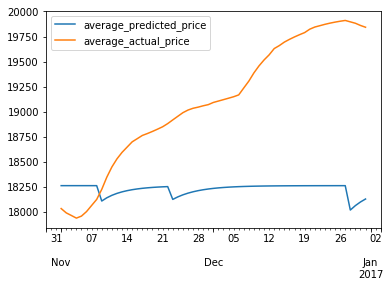

In [44]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [45]:
lr.classes_

array([15660, 15766, 15882, 15885, 15914, 15944, 15954, 15973, 15988,
       15995, 16002, 16009, 16014, 16016, 16024, 16027, 16029, 16069,
       16085, 16086, 16093, 16140, 16145, 16151, 16153, 16167, 16196,
       16204, 16336, 16346, 16363, 16379, 16381, 16391, 16398, 16413,
       16416, 16431, 16449, 16453, 16454, 16460, 16466, 16468, 16484,
       16514, 16516, 16544, 16557, 16598, 16620, 16639, 16697, 16865,
       16899, 16906, 16943, 16964, 16995, 17000, 17006, 17029, 17051,
       17073, 17140, 17148, 17158, 17213, 17217, 17218, 17223, 17227,
       17229, 17251, 17286, 17313, 17325, 17356, 17400, 17409, 17435,
       17481, 17492, 17495, 17498, 17500, 17502, 17515, 17520, 17525,
       17526, 17529, 17530, 17535, 17541, 17556, 17563, 17570, 17576,
       17582, 17593, 17602, 17603, 17609, 17616, 17623, 17633, 17640,
       17651, 17652, 17660, 17674, 17675, 17685, 17694, 17705, 17706,
       17710, 17711, 17716, 17717, 17718, 17720, 17721, 17729, 17732,
       17733, 17737,

In [46]:
lr.coef_[0]

array([ 0.8107473 , -0.30152865, -1.85831103, -0.25810723])

# RandomForestRegressor

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=10,ignore_na=False,adjust=True,min_periods=0).mean()
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=10,ignore_na=False,adjust=True,min_periods=0).mean()
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=10,ignore_na=False,adjust=True,min_periods=0).mean()
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=10,ignore_na=False,adjust

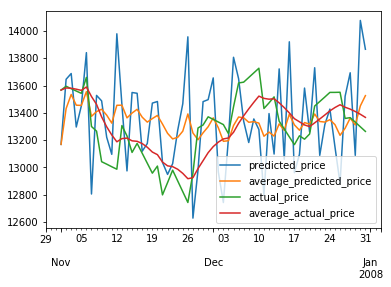

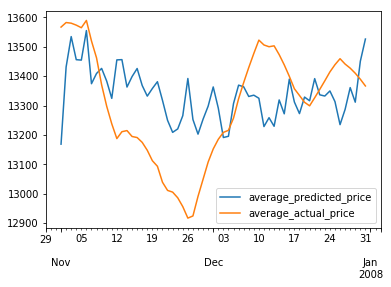

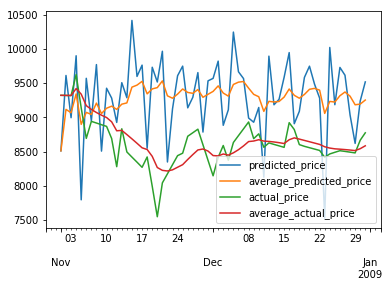

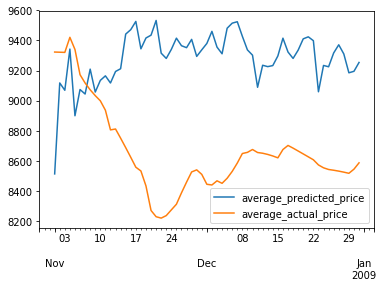

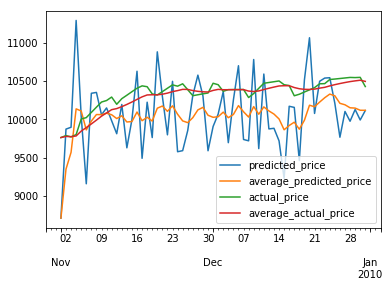

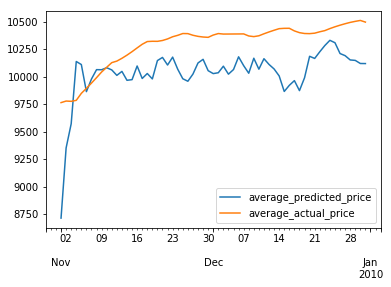

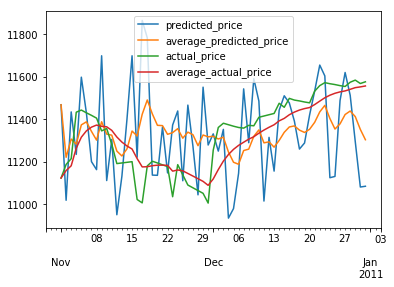

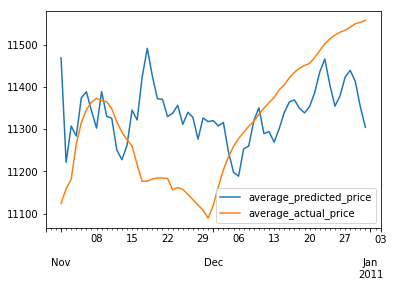

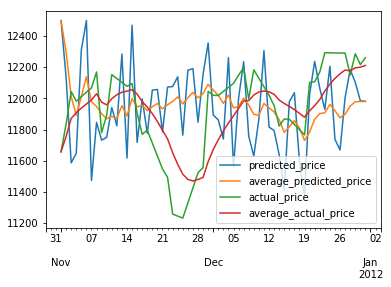

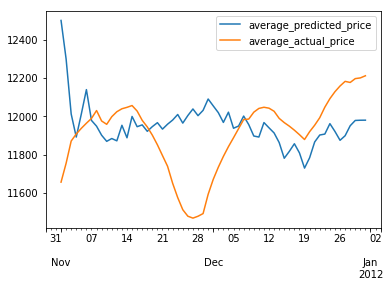

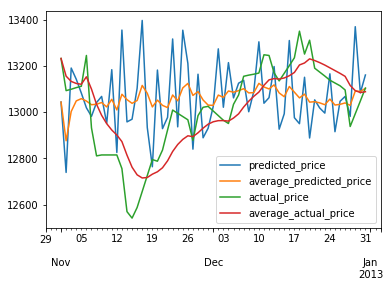

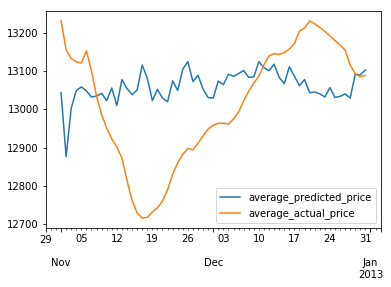

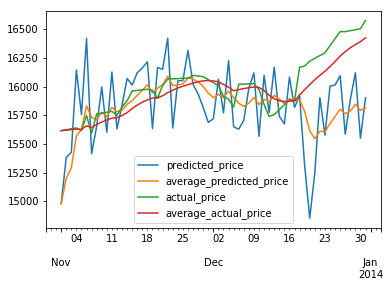

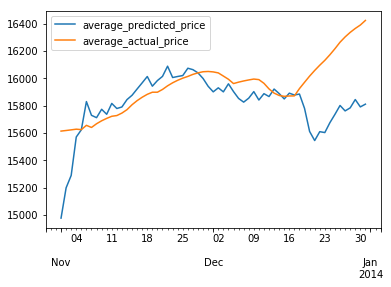

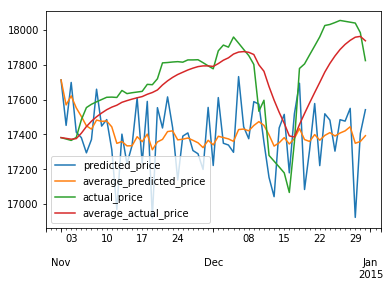

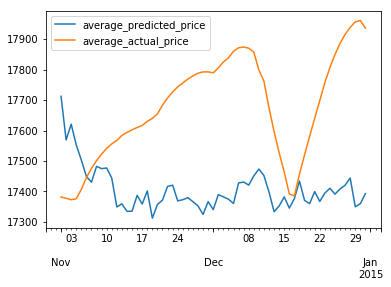

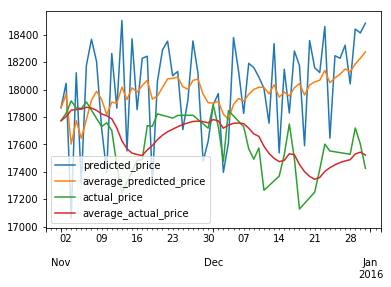

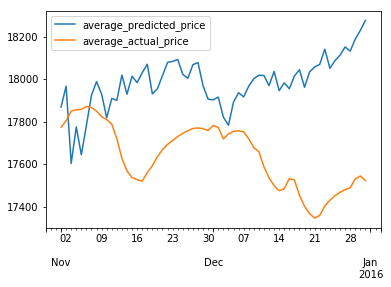

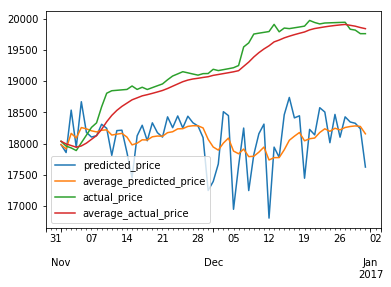

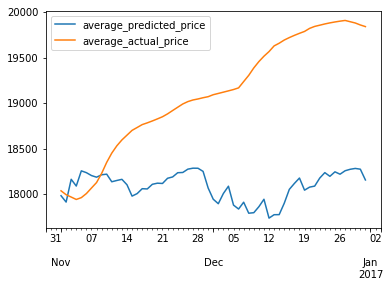

In [49]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=None)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [50]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

# MLP Classifier

/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:57: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=20,ignore_na=False,adjust=True,min_periods=0).mean()
/homes/ld303/dag/lib64/python3.4/site-packages/ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,span=20,ignore_na=False,adjust=True,min_periods=0).mean()


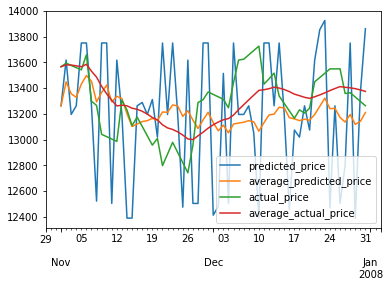

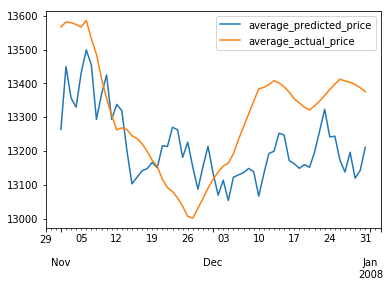

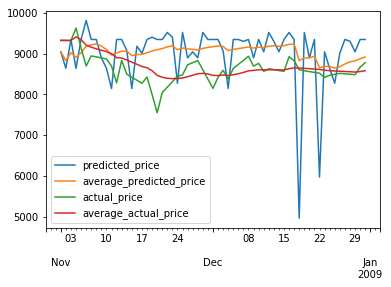

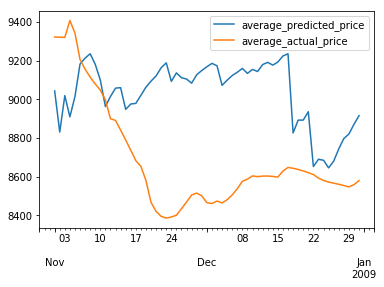

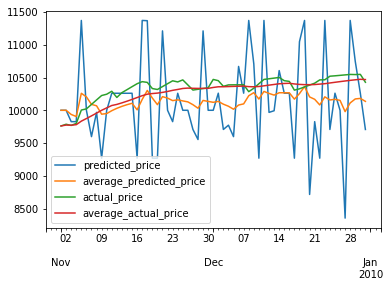

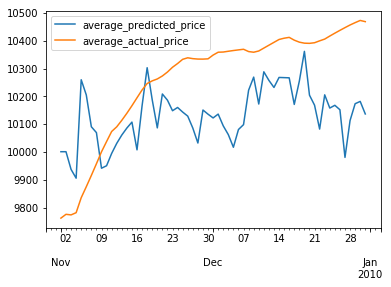

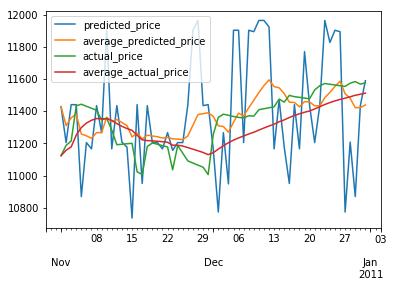

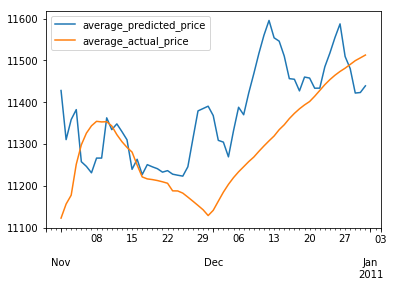

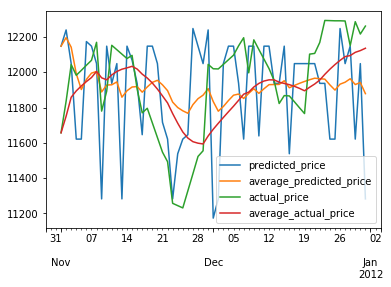

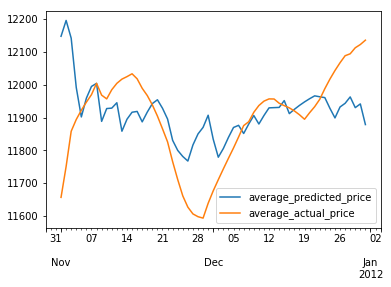

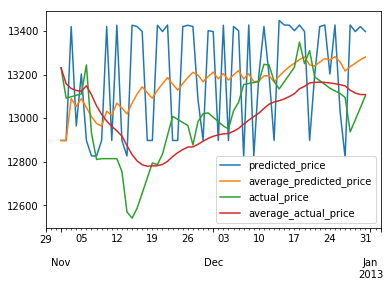

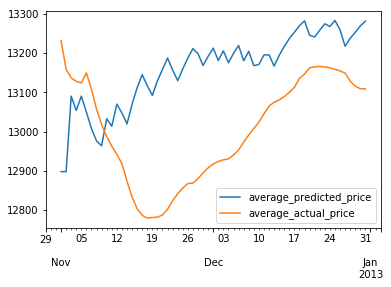

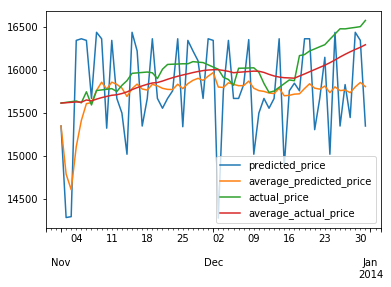

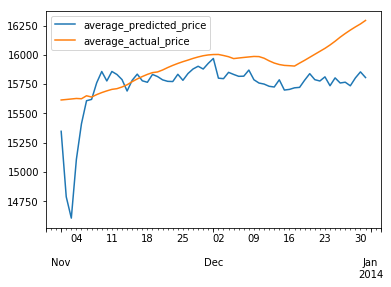

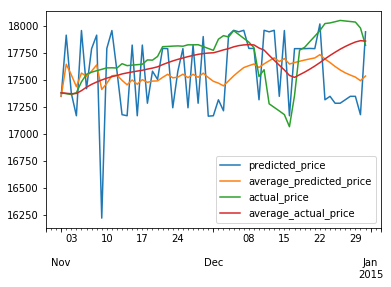

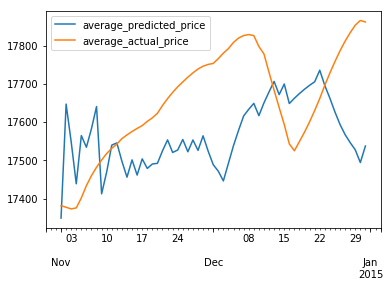

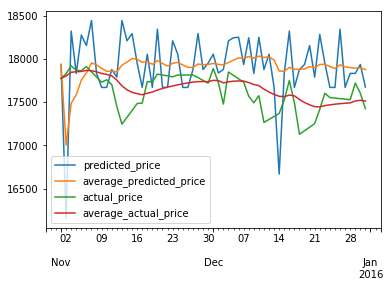

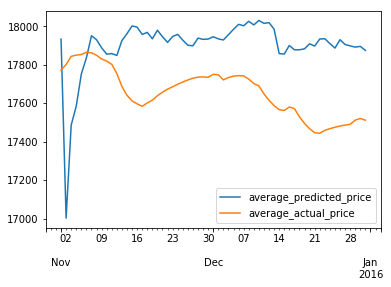

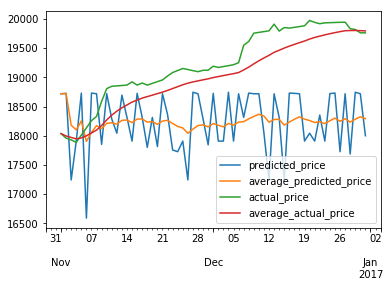

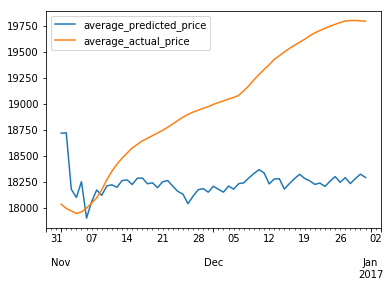

In [51]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=20, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=20, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [53]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
                     

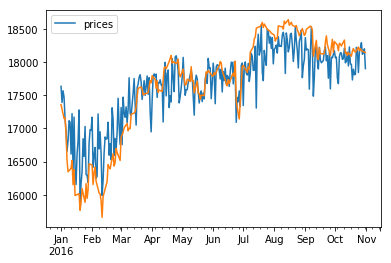

In [54]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()